## Exploratory Data Analysis: Dataset Loading and Overview

This step loads the cleaned training dataset and performs an initial structural check.
The objective is to confirm that the dataset is correctly loaded and to understand
its size before performing further analysis or visualization.


In [2]:
import pandas as pd

data_path = "../data/train_clean.csv"
df = pd.read_csv(data_path)

df.shape


(16990, 4)

## Preview of Dataset Records

This step displays the first few records of the dataset to visually inspect
the cleaned text, labels, and overall data structure.


In [3]:
df.head()


,text,label,clean_text,text_length
0,Here are Thursday's biggest analyst calls: App...,0,here are thursdays biggest analyst calls apple...,92
1,Buy Las Vegas Sands as travel to Singapore bui...,0,buy las vegas sands as travel to singapore bui...,66
2,"Piper Sandler downgrades DocuSign to sell, cit...",0,piper sandler downgrades docusign to sell citi...,83
3,"Analysts react to Tesla's latest earnings, bre...",0,analysts react to teslas latest earnings break...,85
4,Netflix and its peers are set for a ‘return to...,0,netflix and its peers are set for a return to ...,89


## Dataset Structure and Data Types

This step examines column data types and non-null counts to ensure the dataset
is compatible with machine learning workflows.


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16990 entries, 0 to 16989
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         16990 non-null  object
 1   label        16990 non-null  int64 
 2   clean_text   16987 non-null  object
 3   text_length  16990 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 531.1+ KB


## Missing Value Analysis

This step checks for missing values across all columns to evaluate
data completeness and reliability.


In [5]:
df.isnull().sum()


text           0
label          0
clean_text     3
text_length    0
dtype: int64

## Label Distribution (Numerical Analysis)

This step analyzes the number of tweets available for each label.
The goal is to understand class balance and identify whether the dataset
is imbalanced across different financial categories.


In [6]:
df["label"].value_counts().sort_index()


label
0      255
1      837
2     3545
3      321
4      359
5      987
6      524
7      624
8      166
9     1557
10      69
11      44
12     487
13     471
14    1822
15     501
16     985
17     495
18    2118
19     823
Name: count, dtype: int64

## Label Distribution (Visualization)

This step visualizes the distribution of labels using a bar chart.
The objective is to provide an intuitive and visual understanding
of class imbalance across financial news categories.


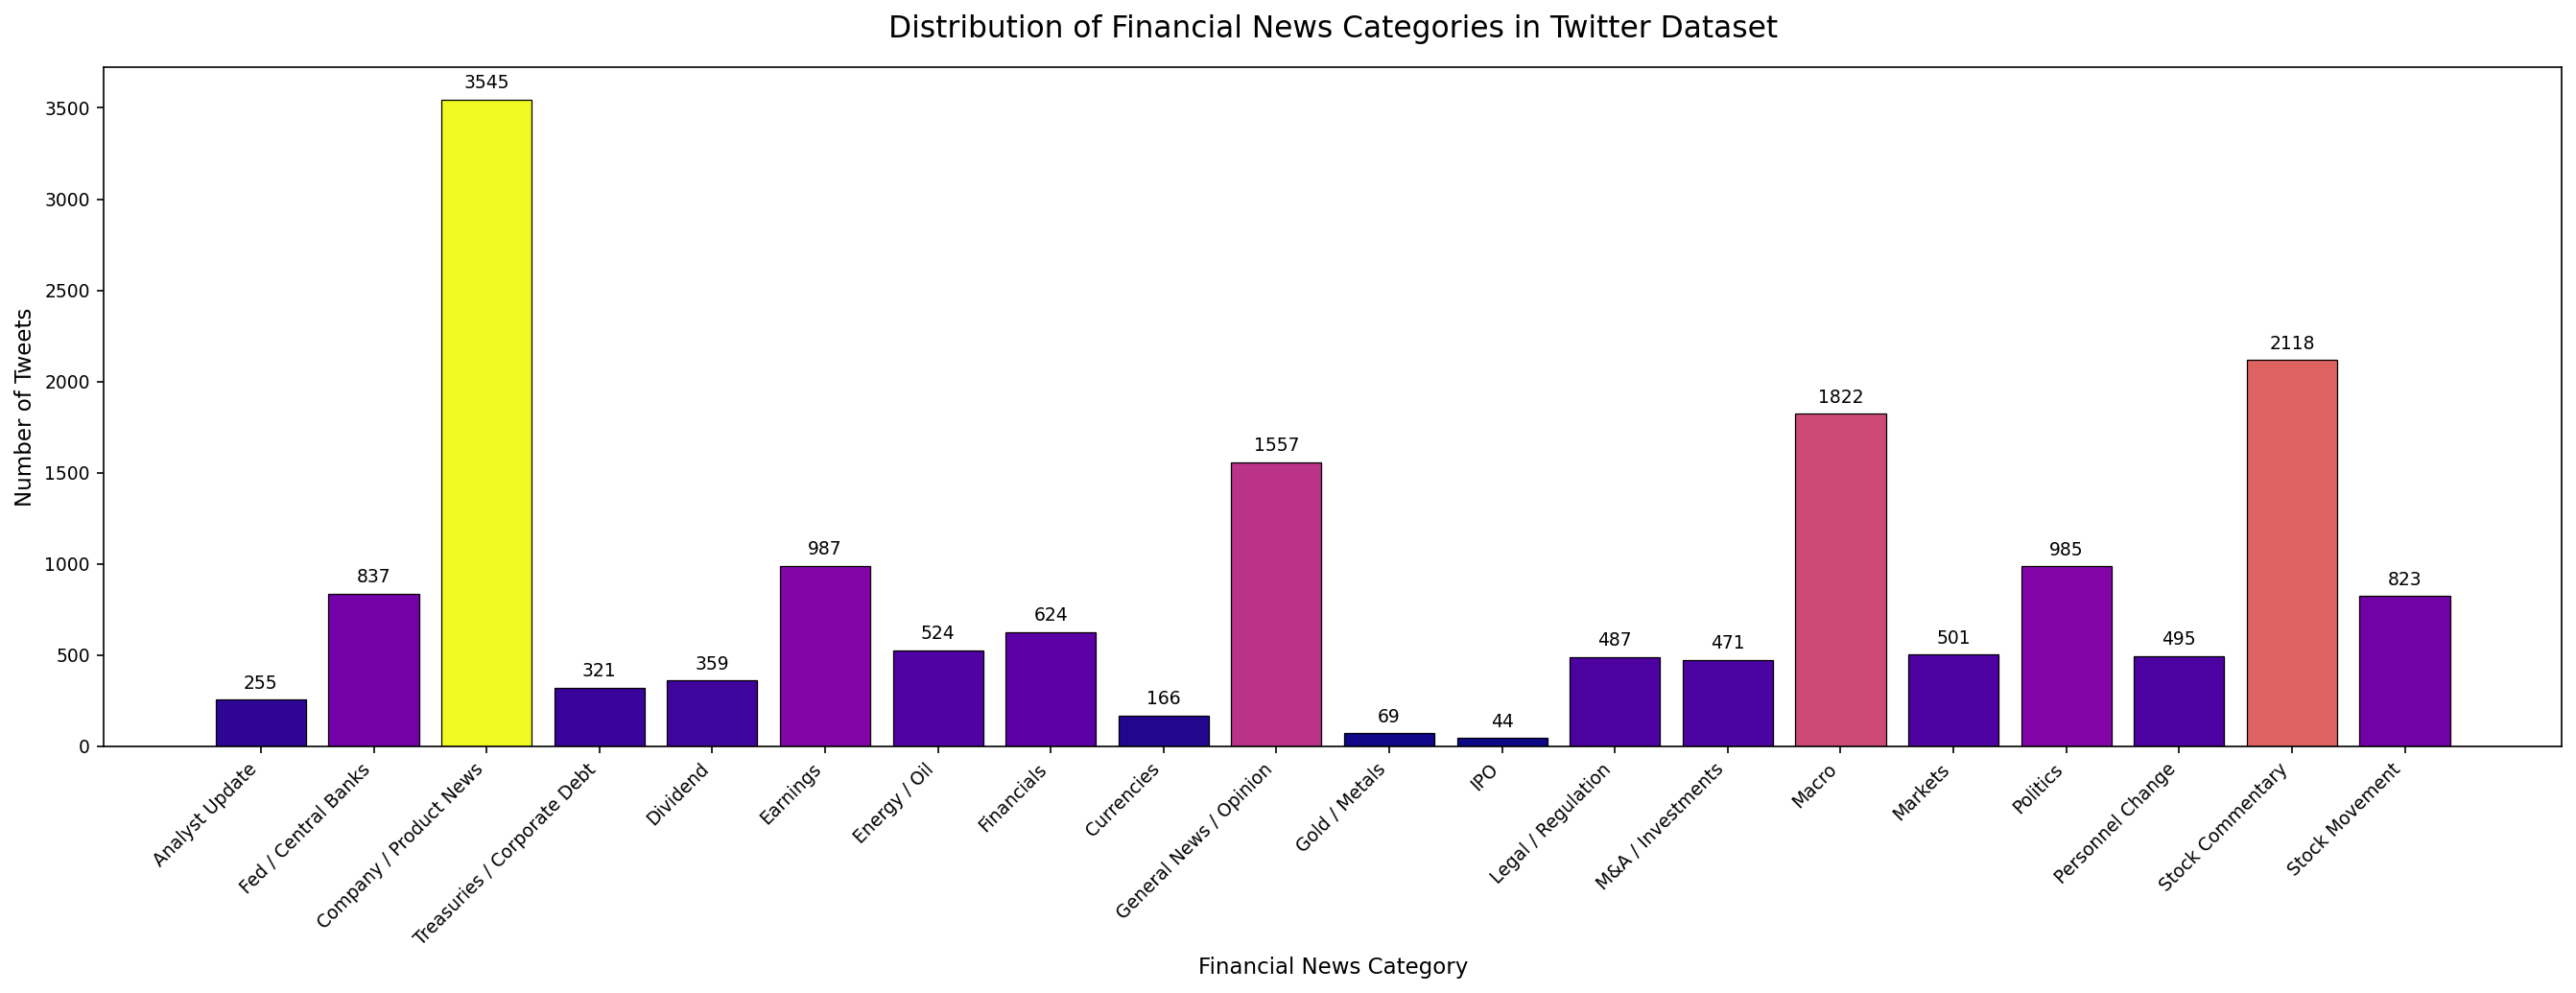

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import os

# Ensure output directory exists
output_dir = "../outputs/plots"
os.makedirs(output_dir, exist_ok=True)

# Label mapping
label_mapping = {
    0: "Analyst Update",
    1: "Fed / Central Banks",
    2: "Company / Product News",
    3: "Treasuries / Corporate Debt",
    4: "Dividend",
    5: "Earnings",
    6: "Energy / Oil",
    7: "Financials",
    8: "Currencies",
    9: "General News / Opinion",
    10: "Gold / Metals",
    11: "IPO",
    12: "Legal / Regulation",
    13: "M&A / Investments",
    14: "Macro",
    15: "Markets",
    16: "Politics",
    17: "Personnel Change",
    18: "Stock Commentary",
    19: "Stock Movement"
}

# Prepare data
label_counts = df["label"].value_counts().sort_index()
labels = [label_mapping[i] for i in label_counts.index]
values = label_counts.values

# Gradient colors
norm = (values - values.min()) / (values.max() - values.min())
colors = cm.plasma(norm)

# High-resolution figure
plt.figure(figsize=(18, 7), dpi=150)
bars = plt.bar(labels, values, color=colors, edgecolor="black", linewidth=0.6)

# Annotate counts on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 40,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title(
    "Distribution of Financial News Categories in Twitter Dataset",
    fontsize=15,
    pad=15
)
plt.xlabel("Financial News Category", fontsize=11)
plt.ylabel("Number of Tweets", fontsize=11)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()

# Save figure (report-quality resolution)
save_path = os.path.join(output_dir, "label_distribution_gradient.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()


## Distribution of Tweet Text Length

This step analyzes the distribution of cleaned tweet lengths in the dataset.
The objective is to understand typical tweet size, detect outliers, and
support decisions related to feature engineering and model configuration.


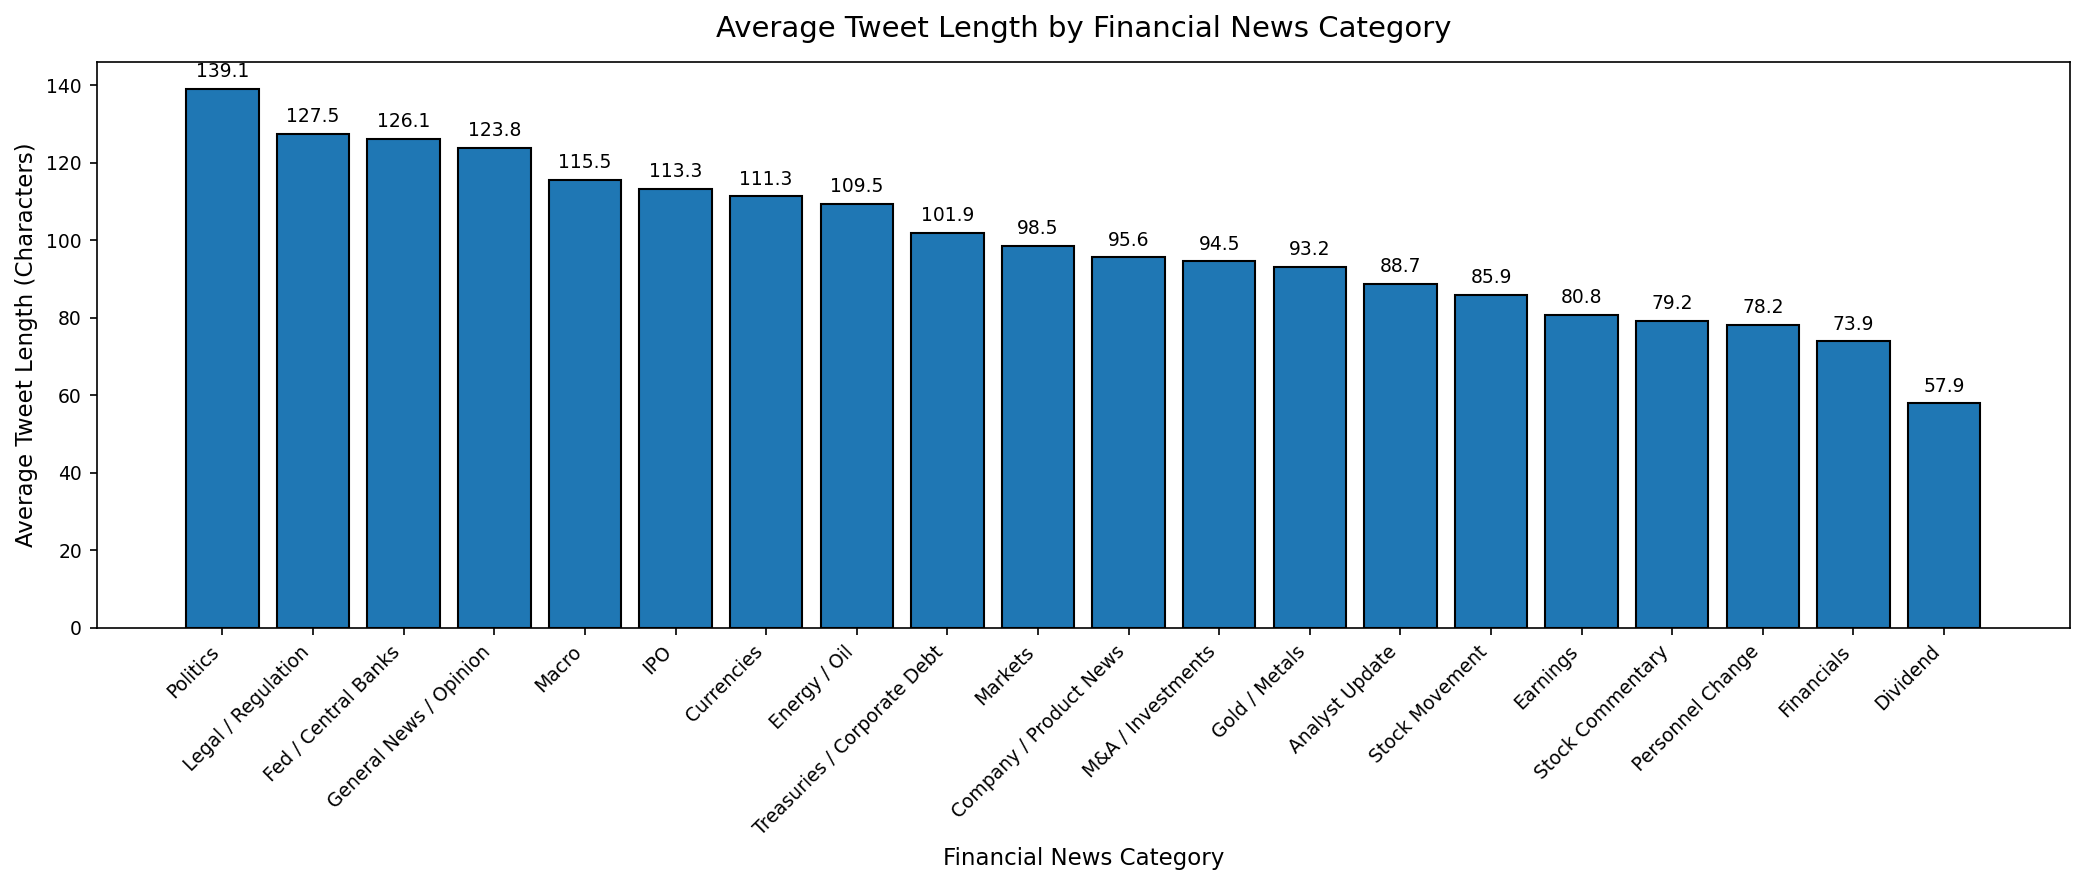

In [13]:
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
output_dir = "../outputs/plots"
os.makedirs(output_dir, exist_ok=True)

# Label mapping
label_mapping = {
    0: "Analyst Update",
    1: "Fed / Central Banks",
    2: "Company / Product News",
    3: "Treasuries / Corporate Debt",
    4: "Dividend",
    5: "Earnings",
    6: "Energy / Oil",
    7: "Financials",
    8: "Currencies",
    9: "General News / Opinion",
    10: "Gold / Metals",
    11: "IPO",
    12: "Legal / Regulation",
    13: "M&A / Investments",
    14: "Macro",
    15: "Markets",
    16: "Politics",
    17: "Personnel Change",
    18: "Stock Commentary",
    19: "Stock Movement"
}

# Map labels
df["label_name"] = df["label"].map(label_mapping)

# Calculate average tweet length per category
avg_length = (
    df.groupby("label_name")["text_length"]
    .mean()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(14, 6), dpi=150)
bars = plt.bar(avg_length.index, avg_length.values, edgecolor="black")

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 2,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("Average Tweet Length by Financial News Category", fontsize=14, pad=12)
plt.xlabel("Financial News Category", fontsize=11)
plt.ylabel("Average Tweet Length (Characters)", fontsize=11)

plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()

# Save chart
save_path = os.path.join(output_dir, "avg_tweet_length_by_category.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()


## Average Tweet Length by Financial News Category – Summary

The analysis of average tweet length across financial news categories reveals
clear differences in communication patterns.

Categories such as **Politics**, **Legal / Regulation**, **Fed / Central Banks**,
and **Macro** exhibit the highest average tweet lengths. These topics typically
require more detailed explanations, contextual information, and policy-related
background, resulting in longer textual content.

In contrast, categories such as **Dividend**, **Financials**, and
**Personnel Change** show significantly shorter average tweet lengths.
These topics are generally more factual and event-driven, often communicated
using concise and direct language.

This observation is important for downstream modeling, as variations in text
length influence feature representation, vectorization limits, and sequence
length decisions in NLP pipelines.


# Exploratory Data Analysis (EDA) Summary

This section summarizes the key findings obtained from the exploratory analysis
of the Twitter Financial News dataset.

---

## 1. Dataset Overview
The dataset consists of finance-related Twitter news posts annotated across
20 distinct financial categories. Each record contains tweet text and its
corresponding category label. The dataset reflects real-world financial news
distribution and complexity.

---

## 2. Data Quality Assessment
A comprehensive missing value check revealed that the dataset is largely clean.
A very small number of records resulted in empty text after preprocessing,
primarily due to tweets containing only URLs or symbols. These records were
identified and handled appropriately during preprocessing.

---

## 3. Label Distribution Analysis
The distribution of labels is highly imbalanced. Certain categories such as
**Company / Product News**, **Stock Commentary**, and **Macro** dominate the dataset,
while others like **IPO** and **Gold / Metals** contain significantly fewer samples.
This confirms that the problem is a realistic multi-class, imbalanced
classification task.

---

## 4. Text Length Distribution
Analysis of cleaned tweet lengths shows substantial variation in tweet size.
Most tweets fall within a moderate character range, while a small number of
longer tweets act as outliers. This information is critical for selecting
appropriate vectorization and sequence length parameters.

---

## 5. Category-wise Text Length Comparison
A comparison of average tweet length across financial categories revealed clear
patterns. Categories such as **Politics**, **Legal / Regulation**, **Fed / Central
Banks**, and **Macro** tend to have longer tweets, indicating context-heavy and
explanatory content. In contrast, categories such as **Dividend**, **Financials**,
and **Personnel Change** are typically concise and factual.

---

## 6. Key Insights from EDA
- The dataset exhibits strong class imbalance, requiring imbalance-aware
  modeling strategies.
- Tweet length varies significantly by category, influencing feature
  engineering decisions.
- Financial news content differs in structure and depth depending on topic,
  reinforcing the need for flexible text representation techniques.

---

## 7. Conclusion
The exploratory analysis provided a strong understanding of dataset structure,
content patterns, and potential modeling challenges. These insights form a
solid foundation for feature engineering and machine learning model development
in subsequent stages of the project.
